# IMPORT LIBRARIES

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned data

In [39]:
df = pd.read_csv(r"D:\internship\proj 3\cleaned_master.csv")


# Convert date column


In [40]:
df['ActivityDate'] = pd.to_datetime(df['ActivityDate'])


# Add sleep efficiency column


In [41]:
df['SleepEfficiency'] = df['TotalMinutesAsleep'] / df['TotalTimeInBed']


# Dataset Overview

In [42]:
# Show how many non-null values each column has
non_null_counts = df.notnull().sum()
print(non_null_counts)


Id                          943
ActivityDate                943
TotalSteps                  943
TotalDistance               943
TrackerDistance             943
LoggedActivitiesDistance    943
VeryActiveDistance          943
ModeratelyActiveDistance    943
LightActiveDistance         943
SedentaryActiveDistance     943
VeryActiveMinutes           943
FairlyActiveMinutes         943
LightlyActiveMinutes        943
SedentaryMinutes            943
Calories                    943
SleepDay                    413
TotalSleepRecords           413
TotalMinutesAsleep          413
TotalTimeInBed              413
Date                          0
WeightKg                      0
BMI                           0
SleepEfficiency             413
dtype: int64


#  Drop Columns Where All Values Are NULL


In [43]:
df_cleaned = df.dropna(axis=1, how='all')

# Print dropped columns
dropped = set(df.columns) - set(df_cleaned.columns)
print("✅ Dropped columns:", dropped)

# change in original dataset
df = df_cleaned


✅ Dropped columns: {'WeightKg', 'BMI', 'Date'}


#  Filter Sleep Data 

In [44]:
# Use this wherever sleep-related charts are needed
df_sleep = df[df['TotalMinutesAsleep'].notnull()]


# VISUALIZATION AND CHARTS

# Chart 1: "Average Steps per User"

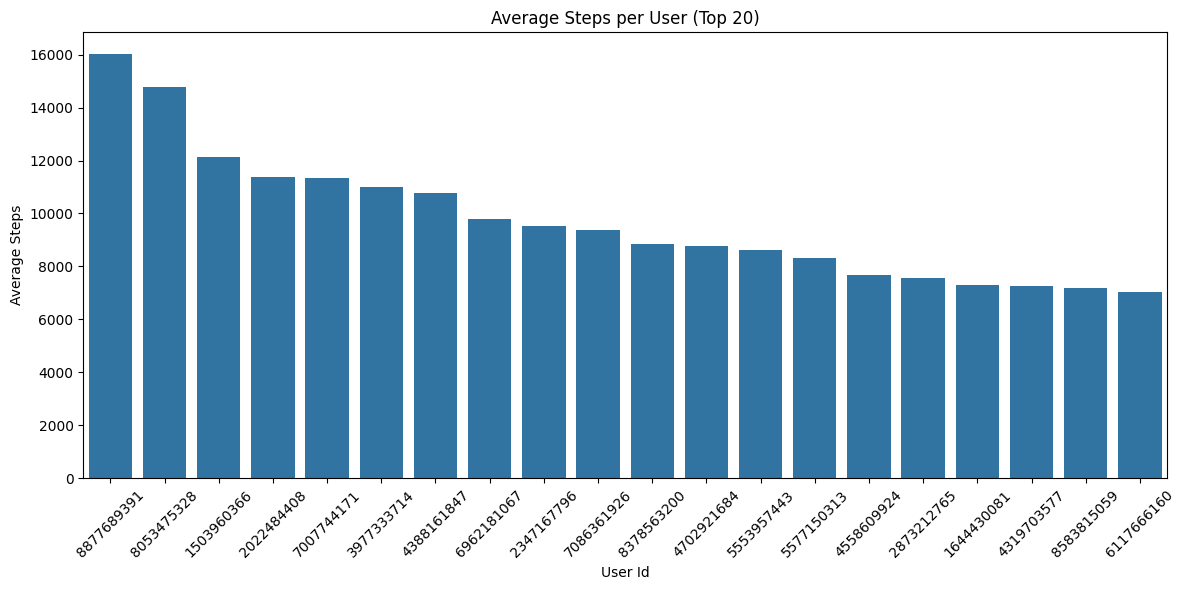

In [45]:
# This chart shows the average number of steps taken by each user.
# It helps compare daily activity levels across users.

avg_steps = df.groupby('Id')['TotalSteps'].mean().sort_values(ascending=False).head(20)

plt.figure(figsize=(12,6))
sns.barplot(x=avg_steps.index.astype(str), y=avg_steps.values)
plt.title("Average Steps per User (Top 20)")
plt.xlabel("User Id")
plt.ylabel("Average Steps")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Chart 2: " Sleep Efficiency Distribution "

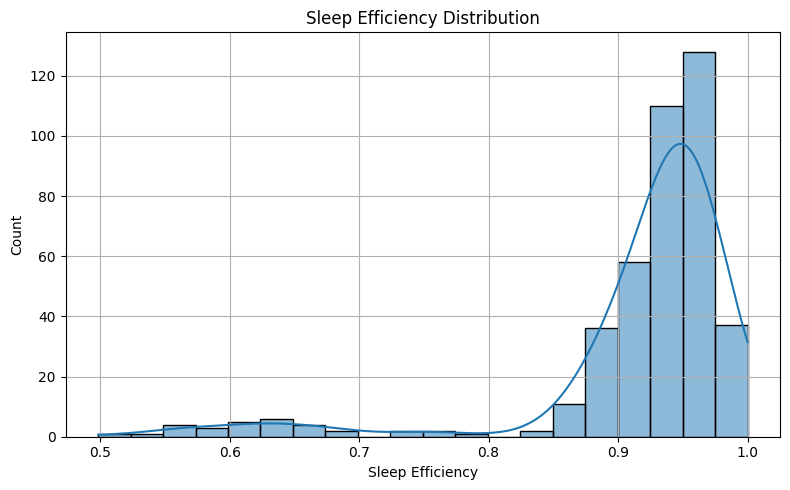

In [46]:
# This histogram shows how efficient users are at sleeping.
# Sleep efficiency = Total minutes asleep / Total time in bed.

plt.figure(figsize=(8,5))
sns.histplot(df['SleepEfficiency'].dropna(), bins=20, kde=True)
plt.title("Sleep Efficiency Distribution")
plt.xlabel("Sleep Efficiency")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()


# Chart 3: "Top 5 Very Active Users"

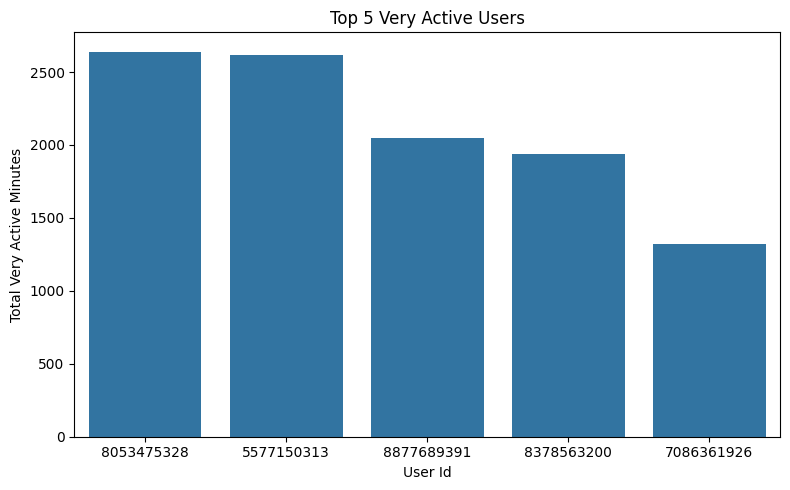

In [47]:
# This chart highlights the top 5 users with the highest total very active minutes.
# It helps identify the most physically active users.

top_active = df.groupby('Id')['VeryActiveMinutes'].sum().nlargest(5)

plt.figure(figsize=(8,5))
sns.barplot(x=top_active.index.astype(str), y=top_active.values)
plt.title("Top 5 Very Active Users")
plt.xlabel("User Id")
plt.ylabel("Total Very Active Minutes")
plt.tight_layout()
plt.show()


# Chart 4: "Steps vs Calories Burned"

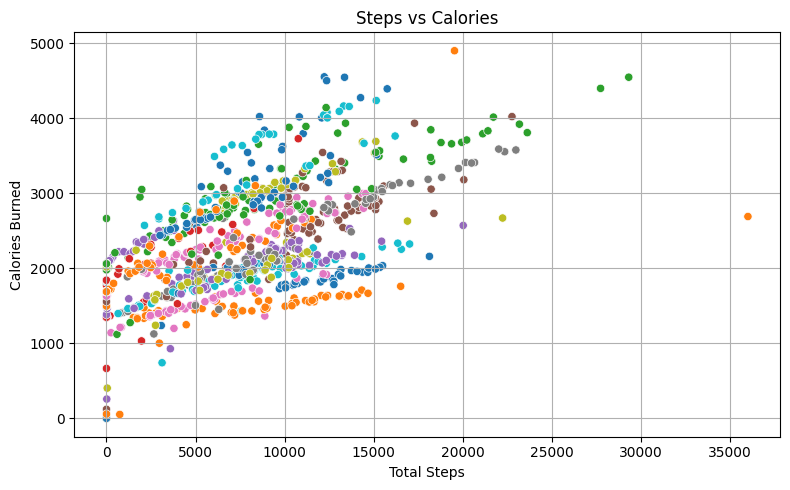

In [48]:
# This scatter plot shows the relationship between steps taken and calories burned.
# It helps visualize how activity levels impact calorie expenditure.

plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='TotalSteps', y='Calories', hue='Id', palette='tab10', legend=False)
plt.title("Steps vs Calories")
plt.xlabel("Total Steps")
plt.ylabel("Calories Burned")
plt.grid(True)
plt.tight_layout()
plt.show()


# Chart 5: "Sleep vs Activity"

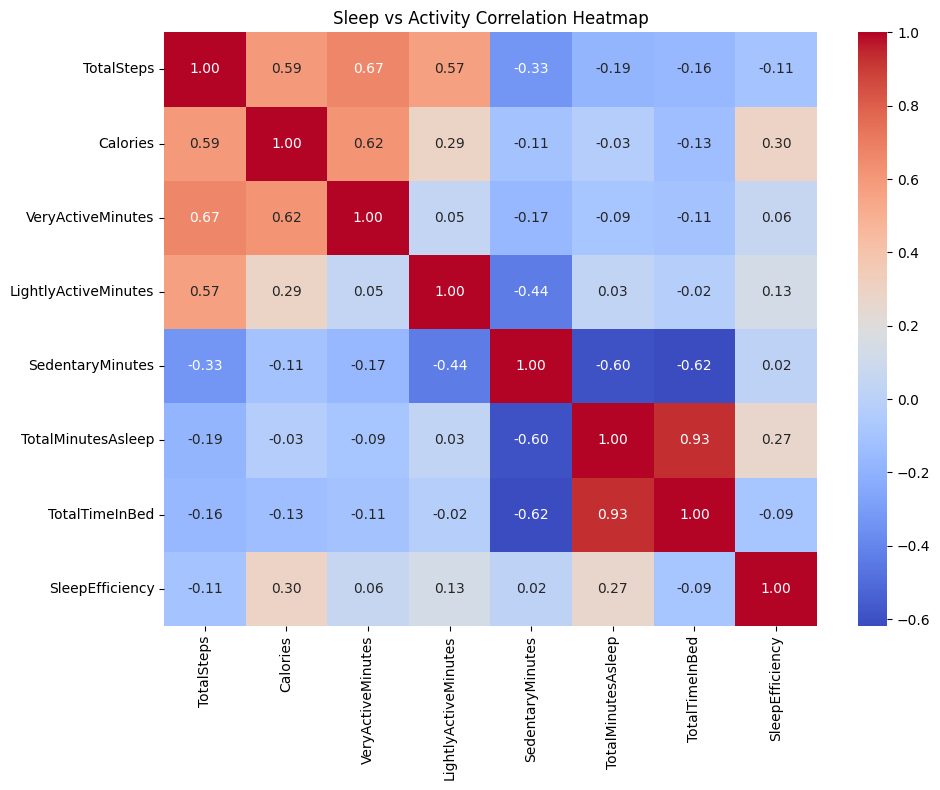

In [49]:
# This heatmap shows correlations between sleep metrics and activity levels.
# It reveals how different factors are related to each other.

plt.figure(figsize=(10,8))
corr_cols = ['TotalSteps', 'Calories', 'VeryActiveMinutes', 'LightlyActiveMinutes', 
             'SedentaryMinutes', 'TotalMinutesAsleep', 'TotalTimeInBed', 'SleepEfficiency']
corr = df[corr_cols].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Sleep vs Activity Correlation Heatmap")
plt.tight_layout()
plt.show()


# Save the updated data with SleepEfficiency

In [50]:
df.to_csv(r"D:\internship\proj 3\4\pandas_with_charts.csv", index=False)